<a href="https://colab.research.google.com/github/Youruler1/Speech-Processing-Lab-Material/blob/main/3_HMM_Speech_Modelling_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading a .wav file using scipy.io

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
sampling_freq, audio = wavfile.read('BAK.wav')
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (367538, 2)
Datatype: int16
Duration: 8.334 seconds


<ipython-input-10-97d73faf4e93>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, audio = wavfile.read('BAK.wav')


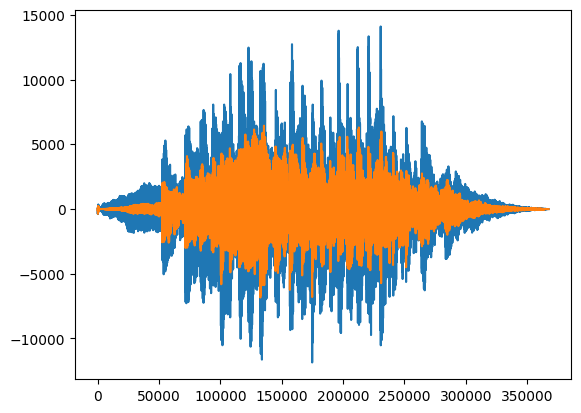

In [ ]:
plt.plot(audio)

Plotting the above sound wave in frequency domain

In [ ]:
transformed_signal = np.fft.fft(audio)

TypeError: 'module' object is not callable

In [ ]:
half_length = np.ceil((len(audio) + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

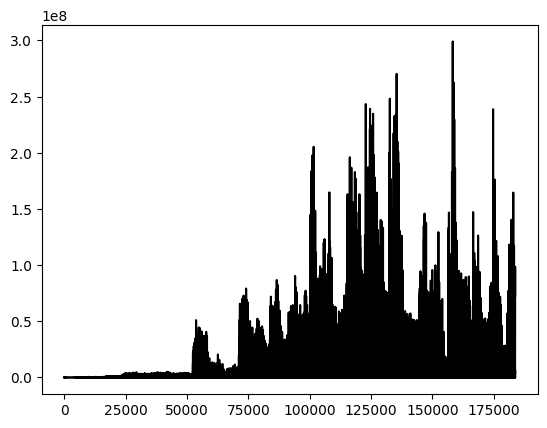

In [ ]:
plt.plot(transformed_signal, color='black')


In [ ]:
audio

array([[ 0.02764325,  0.08292975],
       [ 0.01535736,  0.03992914],
       [-0.01842883, -0.00614294],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

Extracting the features out of the audio file

In [ ]:
import numpy as np
from librosa.feature import mfcc
import librosa
audio,sampling_rate = librosa.load("BAK.wav")
mfcc_features = mfcc(y=audio,sr=sampling_rate)
print("Number of windows =", mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])

Number of windows = 20
Length of each feature = 359


Loading a data set for implementing classification using HMM modelling

In [ ]:
import os
for dirname in os.listdir('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio'):
  subfolder = os.path.join('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio', dirname)
  label = subfolder[subfolder.rfind('/') + 1:]
  print(label)

peach
orange
pineapple
banana
kiwi
apple
lime


In [ ]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 10.8 MB/s eta 0:00:00


In [ ]:
pip install features

In [ ]:
pip install librosa

In [ ]:
from scipy.io import wavfile
from hmmlearn import hmm

Initialising the GMM/HMM model

In [ ]:
class HMMTrainer(object):
   def __init__(self, model_name='GaussianHMM', n_components=7):
     self.model_name = model_name
     self.n_components = n_components

     self.models = []
     if self.model_name == 'GaussianHMM':
        self.model=hmm.GaussianHMM(n_components=7)
     else:
        print("Please choose GaussianHMM")
   def train(self, X):
       self.models.append(self.model.fit(X))
   def get_score(self, input_data):
       return self.model.score(input_data)

Training the input audio files using HMM/GMM model

In [ ]:
import os
import librosa
import numpy as np
from librosa.feature import mfcc
hmm_models = []

for dirname in os.listdir('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio'):
  # Get the name of the subfolder
  subfolder = os.path.join('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/', dirname)
  print(subfolder)
  if not os.path.isdir(subfolder):
    continue
  # Extract the label
  label = subfolder[subfolder.rfind('/') + 1:]
  # Initialize variables
  X = np.array([])
  y_words = []
  for filename in [x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]:
   # Read the input file
   filepath = os.path.join(subfolder, filename)
   audio, sampling_freq = librosa.load(filepath)
   # Extract MFCC features
   mfcc_features = mfcc(y=audio,sr=sampling_freq)
   # Append to the variable X
   if len(X) == 0:
     X = mfcc_features[:,:15]
   else:
     X = np.append(X, mfcc_features[:,:15], axis=0)
   # Append the label
   y_words.append(label)
   print('X.shape =', X.shape)
   hmm_trainer = HMMTrainer()
  hmm_trainer.train(X)
  hmm_models.append((hmm_trainer, y_words))
  hmm_trainer = None

/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/peach
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X.shape = (280, 15)
/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/orange
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X.shape = (280, 15)
/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X

In [ ]:
y_words

['lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime',
 'lime']

In [ ]:
X

array([[-4.2599377e+02, -3.8069028e+02, -3.6196051e+02, ...,
        -2.2916385e+02, -2.4298715e+02, -2.6150186e+02],
       [ 1.4635214e+02,  1.8174866e+02,  2.0082193e+02, ...,
         2.4880457e+02,  2.3750909e+02,  2.2582849e+02],
       [-1.7820213e+01, -1.1560230e+01, -2.8162863e+00, ...,
        -1.0406282e+02, -9.9833374e+01, -9.4346207e+01],
       ...,
       [-2.0086942e+00, -3.2954140e+00, -1.1205487e+00, ...,
        -2.1456182e-02, -3.8990724e-01,  1.0714282e+00],
       [ 2.0547547e+00,  1.4250462e+00, -2.9589248e+00, ...,
         6.7825294e-01,  6.8727970e+00,  8.7027168e+00],
       [ 2.3632836e-01, -3.5342035e+00, -1.3295733e+01, ...,
        -2.0292858e+01, -1.5838666e+01, -1.5982471e+01]], dtype=float32)

In [ ]:
hmm_models

[(<__main__.HMMTrainer at 0x7af5c23a4150>,
  ['peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach']),
 (<__main__.HMMTrainer at 0x7af5c26c0210>,
  ['orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange']),
 (<__main__.HMMTrainer at 0x7af5c1d38690>,
  ['pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple']),
 (<__main__.HMMTrainer at 0x7af5c1d38ed0>,
  ['banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana',
   'banana']),
 (<__main__.HMMTrainer at 0x7af5c2828690>,
  ['kiwi',
   'kiwi',

Test data

In [ ]:
input_files = [
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple/pineapple15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/orange/orange15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/apple/apple15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/kiwi/kiwi15.wav'
]

Testing the GMM/HMM model for the above test data

In [ ]:
scores=[]
i=0
for item in hmm_models:
    hmm_model, label = item
    # Extract MFCC features with 15 coefficients, consistent with training data
    audio, sampling_freq = librosa.load(input_files[0])
    mfcc_features = mfcc(y=audio, sr=sampling_freq)[:, :15]
    score = hmm_model.get_score(mfcc_features)
    scores.append(score)
    index=np.array(scores).argmax()
    # Print the output
print("\nTrue:", input_files[0])
print("Predicted:", hmm_models[index][1])


True: /content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple/pineapple15.wav
Predicted: pineapple


In [ ]:
hmm_models[0][1]

'peach'